# Data Preprocessing

In [ ]:
# Loading all important Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Connecting thr drive to google cloab file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting the path of google drive repository 
path ='/content/drive/MyDrive/Last ML!/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading all the datasets name in the list from 'DATA' folder 
datasets = os.listdir(os.path.join(path+'Data/'))
datasets

['standing15 [MConverter.eu].csv', 'walking15-2 [MConverter.eu].csv']

In [ ]:
# Creating a list of all the common column names
col_names =["AccelX:","AccelY:","AccelZ:","GyroX:","GyroY:","GyroZ:"]

In [ ]:
# Reading the each dataset using pandas lib
df = pd.read_csv(os.path.join(path+'Data/'+ datasets[0]))

# In order to change the dataset, chnage the index value of 'dataset[0]' to 1 and vise versa 
df

,Time:25507,AccelX:10.60,AccelY:-0.21,AccelZ:1.16,GyroX:-0.63,GyroY:0.82,GyroZ:-0.63
0,Time:26801,AccelX:9.14,AccelY:1.25,AccelZ:3.80,GyroX:-0.71,GyroY:-0.25,GyroZ:-0.04
1,Time:26878,AccelX:10.30,AccelY:0.93,AccelZ:4.17,GyroX:-0.50,GyroY:-0.20,GyroZ:0.02
2,Time:27080,AccelX:9.96,AccelY:1.25,AccelZ:3.50,GyroX:-0.51,GyroY:-0.05,GyroZ:0.02
3,Time:30225,AccelX:9.40,AccelY:1.10,AccelZ:4.14,GyroX:-0.56,GyroY:-0.08,GyroZ:-0.01
4,Time:43738,AccelX:9.86,AccelY:1.16,AccelZ:2.68,GyroX:-0.56,GyroY:-0.11,GyroZ:-0.03
...,...,...,...,...,...,...,...
2072,Time:1228024,AccelX:9.88,AccelY:0.41,AccelZ:2.89,GyroX:-0.66,GyroY:-0.06,GyroZ:-0.03
2073,Time:1228319,AccelX:9.97,AccelY:0.31,AccelZ:2.49,GyroX:-0.48,GyroY:0.00,GyroZ:-0.01
2074,Time:1228396,AccelX:9.90,AccelY:0.35,AccelZ:2.35,GyroX:-0.46,GyroY:0.15,GyroZ:-0.04
2075,Time:1228639,AccelX:9.67,AccelY:0.41,AccelZ:3.81,GyroX:-0.52,GyroY:0.41,GyroZ:-0.03


In [ ]:
# Removing the extra time column from the dataset
df.drop([df.columns[0]],axis=1,inplace=True)

In [ ]:
# Data Preprocessing
count = 0
for col in df.columns:
   for index in df.index:
      value = str(df.loc[index,col])
      value = value.replace(col_names[count],'')
      value = float(value)
      df.loc[index,col] = value
   count += 1

In [ ]:
df

,AccelX:10.60,AccelY:-0.21,AccelZ:1.16,GyroX:-0.63,GyroY:0.82,GyroZ:-0.63
0,9.14,1.25,3.8,-0.71,-0.25,-0.04
1,10.3,0.93,4.17,-0.5,-0.2,0.02
2,9.96,1.25,3.5,-0.51,-0.05,0.02
3,9.4,1.1,4.14,-0.56,-0.08,-0.01
4,9.86,1.16,2.68,-0.56,-0.11,-0.03
...,...,...,...,...,...,...
2072,9.88,0.41,2.89,-0.66,-0.06,-0.03
2073,9.97,0.31,2.49,-0.48,0.0,-0.01
2074,9.9,0.35,2.35,-0.46,0.15,-0.04
2075,9.67,0.41,3.81,-0.52,0.41,-0.03


In [ ]:
# Renaming the column names 
df.rename(columns={df.columns[0]:col_names[0][:-1],
                   df.columns[1]:col_names[1][:-1],
                   df.columns[2]:col_names[2][:-1],
                   df.columns[3]:col_names[3][:-1],
                   df.columns[4]:col_names[4][:-1],
                   df.columns[5]:col_names[5][:-1]},inplace=True)
df

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
0,9.14,1.25,3.8,-0.71,-0.25,-0.04
1,10.3,0.93,4.17,-0.5,-0.2,0.02
2,9.96,1.25,3.5,-0.51,-0.05,0.02
3,9.4,1.1,4.14,-0.56,-0.08,-0.01
4,9.86,1.16,2.68,-0.56,-0.11,-0.03
...,...,...,...,...,...,...
2072,9.88,0.41,2.89,-0.66,-0.06,-0.03
2073,9.97,0.31,2.49,-0.48,0.0,-0.01
2074,9.9,0.35,2.35,-0.46,0.15,-0.04
2075,9.67,0.41,3.81,-0.52,0.41,-0.03


In [ ]:
# Checking the datatype of Dataset 
df.dtypes

AccelX    object
AccelY    object
AccelZ    object
GyroX     object
GyroY     object
GyroZ     object
dtype: object

In [ ]:
# Converting the datatype into float 
df = df.astype('float')

In [ ]:
# Rechecking the datatype 
df.dtypes

AccelX    float64
AccelY    float64
AccelZ    float64
GyroX     float64
GyroY     float64
GyroZ     float64
dtype: object

In [ ]:
# Adding the extra column for the prediction output 

# 0 for Walking 
# 1 for Sitting
# 2 for Standing

for i in df.index:
   df.loc[i,'Mode'] = 2

In [ ]:
df

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,Mode
0,9.14,1.25,3.80,-0.71,-0.25,-0.04,2.0
1,10.30,0.93,4.17,-0.50,-0.20,0.02,2.0
2,9.96,1.25,3.50,-0.51,-0.05,0.02,2.0
3,9.40,1.10,4.14,-0.56,-0.08,-0.01,2.0
4,9.86,1.16,2.68,-0.56,-0.11,-0.03,2.0
...,...,...,...,...,...,...,...
2072,9.88,0.41,2.89,-0.66,-0.06,-0.03,2.0
2073,9.97,0.31,2.49,-0.48,0.00,-0.01,2.0
2074,9.90,0.35,2.35,-0.46,0.15,-0.04,2.0
2075,9.67,0.41,3.81,-0.52,0.41,-0.03,2.0


In [ ]:
# Saving the dataframe in to .csv format
df.to_csv(path+"Standing01.csv")

# Model Traning

In [ ]:
# Loading all the pre process datasets from the drive
df1 = pd.read_csv(path+"Sitting01.csv")
df2 = pd.read_csv(path+"Walking01.csv")
df3 = pd.read_csv(path+"Walking02.csv")
df4 = pd.read_csv(path+"Standing01.csv") 

In [ ]:
# Merage all the dataset into a single dataframe
df = pd.concat([df1,df2,df3,df4],axis=0)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,Mode
0,9.56,0.26,3.62,-1.25,-0.26,0.12,1.0
1,10.07,-0.23,1.78,-1.12,-0.12,0.02,1.0
2,10.78,0.30,2.34,-0.64,0.21,-0.24,1.0
3,9.26,-0.07,4.10,-0.03,0.58,0.53,1.0
4,9.93,0.19,1.86,-0.76,0.07,-0.47,1.0
...,...,...,...,...,...,...,...
2072,9.88,0.41,2.89,-0.66,-0.06,-0.03,2.0
2073,9.97,0.31,2.49,-0.48,0.00,-0.01,2.0
2074,9.90,0.35,2.35,-0.46,0.15,-0.04,2.0
2075,9.67,0.41,3.81,-0.52,0.41,-0.03,2.0


In [ ]:
# Split the dependent and independent column into X and Y variable 
X = df.drop(['Mode'],axis=1)
Y = df['Mode']

In [ ]:
# Loading train and Test split from sklearn lib
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting the data into 30% testing data and 70% training dataset 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [ ]:
# Loading all the lib
from sklearn.pipeline import make_pipeline #To creating a machine learning pipeline
from sklearn.preprocessing import StandardScaler  # loading Standard Scaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier # loading 2 liner pre trained model
# 1 LogisticRegression
# 2 RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #Loading next 2 classifer pre trained model
# 3 RandomForestClassifier
# 4 GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# Creating the pipeline 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=100000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'svc':make_pipeline(StandardScaler(), SVC())
}

In [ ]:
# Fit the data in the pipeline to train the model
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(x_train, y_train)
    fit_models[algo] = model

In [ ]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=100000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'svc': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

In [ ]:
# Testing the RidgeClassifier model
fit_models['rc'].predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score # to check accuracy score 
import pickle #to save the model

In [ ]:
# Checking the accuracy of each model
print("Accuracy of the models ")
for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print(algo, accuracy_score(y_test, yhat))

Accuracy of the models 
lr 0.7755417956656346
rc 0.7585139318885449
rf 0.9507739938080495
gb 0.9470588235294117
svc 0.9520123839009288


It has shown as 'rf' (RandomForestClassifier()) model and 'svc' (SupportVectorClassifier()) model has the highest accuracy 

In [ ]:
# Saving the svc model using pickel 
with open(path+'model_svc.pkl', 'wb') as f:
    pickle.dump(fit_models['svc'], f)

[[2329    5   43]
 [  18  181   43]
 [  45    1  565]]


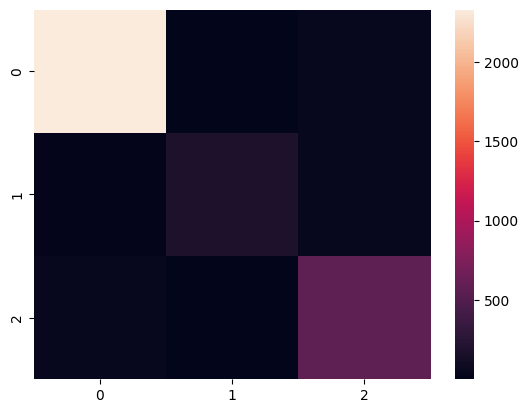

In [ ]:
# Creating confusion matrix 
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, yhat)
print(con)
sns.heatmap(con)
plt.show()

# Testing the model

## Average of 10sec Data


In [ ]:
# Loading import lib
import pickle
import os
import pandas as pd

In [ ]:
# Loading the save model using pickel 
with open(path+'model_svc.pkl', 'rb') as f:
    load_model = pickle.load(f)

In [ ]:
col_names =["Time:","AccelX:","AccelY:","AccelZ:","GyroX:","GyroY:","GyroZ:"]

In [ ]:
df = pd.read_csv(path+'Data/'+'standing15 [MConverter.eu].csv')

# Data Preprocessing
count = 0
for col in df.columns:
   for index in df.index:
      value = str(df.loc[index,col])
      value = value.replace(col_names[count],'')
      value = float(value)
      df.loc[index,col] = value
   count += 1


In [ ]:
# Renaming the column names 
df.rename(columns={df.columns[0]:col_names[0][:-1],
                   df.columns[1]:col_names[1][:-1],
                   df.columns[2]:col_names[2][:-1],
                   df.columns[3]:col_names[3][:-1],
                   df.columns[4]:col_names[4][:-1],
                   df.columns[5]:col_names[5][:-1],
                   df.columns[6]:col_names[6][:-1]},inplace=True)

df.head(10)

,Time,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ
0,26801.0,9.14,1.25,3.8,-0.71,-0.25,-0.04
1,26878.0,10.3,0.93,4.17,-0.5,-0.2,0.02
2,27080.0,9.96,1.25,3.5,-0.51,-0.05,0.02
3,30225.0,9.4,1.1,4.14,-0.56,-0.08,-0.01
4,43738.0,9.86,1.16,2.68,-0.56,-0.11,-0.03
5,43774.0,9.87,1.08,2.64,-0.58,-0.09,-0.04
6,44859.0,10.29,1.23,1.64,-0.58,0.07,-0.01
7,45352.0,9.96,1.28,1.92,-0.69,0.07,-0.03
8,52719.0,9.05,1.26,4.06,-0.65,0.11,-0.09
9,52755.0,9.0,1.16,4.12,-0.62,0.07,-0.04


In [ ]:
i = 0
while i <= 10:
  for j in df.index:
    t = -(df.loc[i,'Time'] - df.loc[j,'Time'])/1000
    if t>=10:
      avg_data = pd.DataFrame([df.iloc[i:j].mean()[1:]])
      Result = load_model.predict(avg_data)
      if Result == 0:
        print(f"Prediction of row {i}-{j} of {round(t,1)}sec time-interval is : Walking")
      elif Result == 2:
        print(f"Prediction of row {i}-{j} of {round(t,1)}sec time-interval is : Standing")    
      break
  i += 1


Prediction of row 0-4 of 16.9sec time-interval is : Standing
Prediction of row 1-4 of 16.9sec time-interval is : Standing
Prediction of row 2-4 of 16.7sec time-interval is : Standing
Prediction of row 3-4 of 13.5sec time-interval is : Standing
Prediction of row 4-12 of 13.9sec time-interval is : Standing
Prediction of row 5-12 of 13.8sec time-interval is : Standing
Prediction of row 6-12 of 12.8sec time-interval is : Standing
Prediction of row 7-12 of 12.3sec time-interval is : Standing
Prediction of row 8-21 of 11.4sec time-interval is : Standing
Prediction of row 9-21 of 11.4sec time-interval is : Standing
Prediction of row 10-21 of 10.7sec time-interval is : Standing


In [ ]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import tensorflow as tf

# Load the pipeline object using pickle
with open(path+'model_svc.pkl', 'rb') as f:
    pipeline = pickle.load(f)

# Extract the SVC model from the pipeline
# Extract the SVC model from the pipeline using the named_steps attribute.
svc_model = pipeline.named_steps['svc']

# Convert the SVC model to a Keras model
input_shape = svc_model.support_vectors_.shape[1]
model_input = tf.keras.Input(shape=(input_shape,))
model_output = tf.keras.layers.Dense(1, activation='sigmoid')(model_input)
keras_model = tf.keras.Model(model_input, model_output)

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

# Save the converted model to disk
with open(path+'model_svc.tflite', 'wb') as f:
    f.write(tflite_model)
